In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [3]:
# Parameters for each cluster
clusters = [
    {"mean": [-6, 8], "cov": [[0.4, 0], [0, 0.4]], "size": 100},
    {"mean": [-4, 7], "cov": [[1, 2], [2, 5]], "size": 100},
    {"mean": [8, -6], "cov": [[0.4, 0], [0, 0.4]], "size": 100},
    {"mean": [4, -10], "cov": [[1, 2], [2, 5]], "size": 100}
]

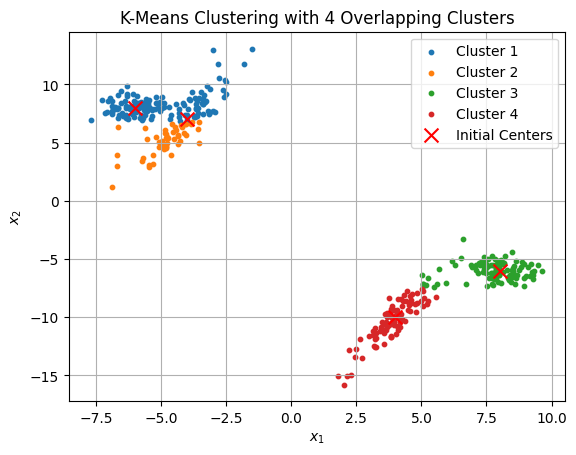

In [ ]:
# Generate data points for each cluster
data = []
for cluster in clusters:
    points = np.random.multivariate_normal(cluster["mean"], cluster["cov"], cluster["size"])
    data.append(points)

# Concatenate all data points
data = np.vstack(data)

# Apply K-Means with 4 clusters and specified initial centers
initial_centers = np.array([[-6, 8], [-4, 7], [8, -6], [4, -10]])
kmeans = KMeans(n_clusters=4, init=initial_centers, n_init=1, random_state=42)
kmeans.fit(data)
labels = kmeans.labels_

# Plot the data points with cluster assignments
plt.figure(figsize=(8, 6))
for i in range(4):
    cluster_points = data[labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {i+1}", s=10)

plt.scatter(initial_centers[:, 0], initial_centers[:, 1], c='red', marker='x', s=100, label="Initial Centers")
plt.title("K-Means Clustering with 4 Overlapping Clusters")
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")
plt.legend()
plt.grid(True)
plt.show()